In [2]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())

d:\github\coding-academy\courses\data_analysis\d051


<IPython.core.display.Javascript object>

In [10]:
drinks = pd.read_csv("../../../../data/drinks.csv")
display(drinks.head())
drinks.info()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


<IPython.core.display.Javascript object>

In [3]:
drinks_pre = drinks.copy()
drinks_pre["continent"] = drinks_pre["continent"].fillna("OT").astype("category")
drinks_pre.columns = ["country", "beer", "spirit", "wine", "alcohol", "continent"]
drinks_pre.set_index("country", inplace=True)
display(drinks_pre.head())

,beer,spirit,wine,alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF


<IPython.core.display.Javascript object>

In [4]:
drinks_only = drinks_pre.iloc[:, :4]
display(drinks_only.corr(method="pearson"))

,beer,spirit,wine,alcohol
beer,1.000000,0.458819,0.527172,0.835839
spirit,0.458819,1.000000,0.194797,0.654968
wine,0.527172,0.194797,1.000000,0.667598
alcohol,0.835839,0.654968,0.667598,1.000000


<IPython.core.display.Javascript object>

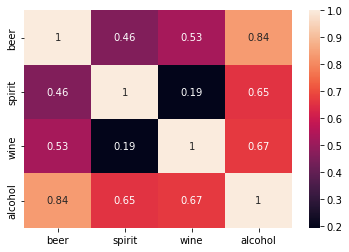

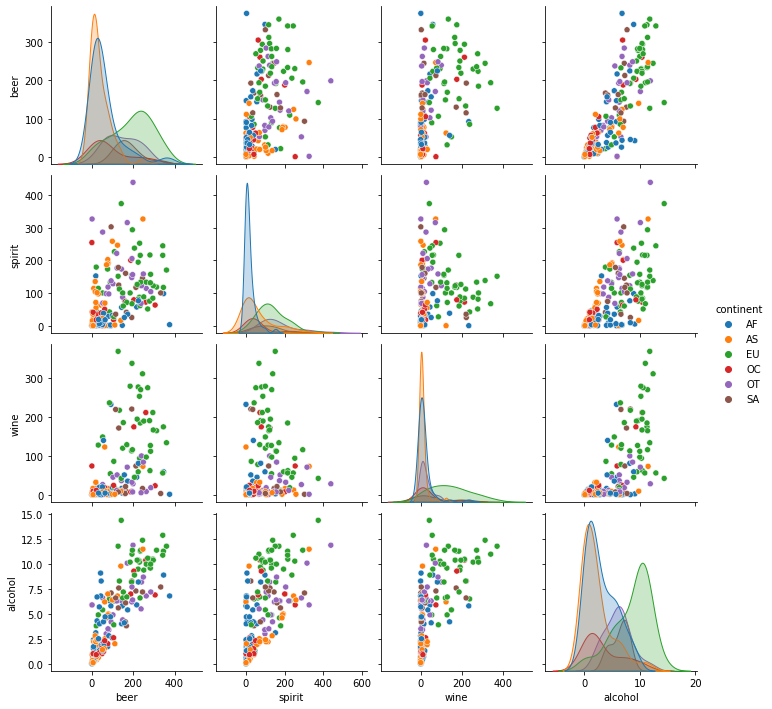

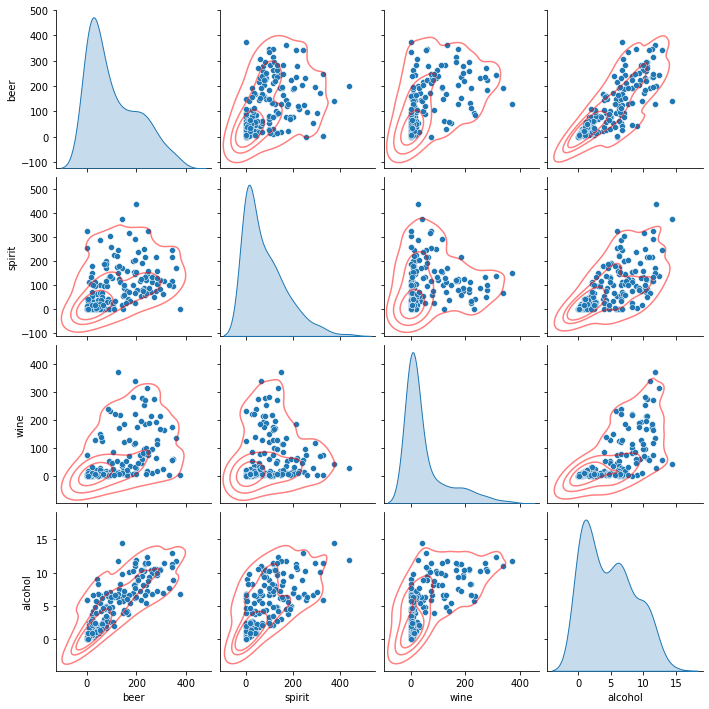

<IPython.core.display.Javascript object>

In [5]:
sns.heatmap(drinks_only.corr(method="pearson"), annot=True)
sns.pairplot(drinks_pre, hue="continent")
sns.pairplot(drinks_only, kind="kde", plot_kws={"levels": 4, "color": "red", "alpha":0.5}).map_offdiag(sns.scatterplot)